In [6]:
import tensorflow as tf
from tensorflow import keras #Sequential and functional API
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 88s 1us/step
(50000, 32, 32, 3)
(50000, 1)


In [9]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


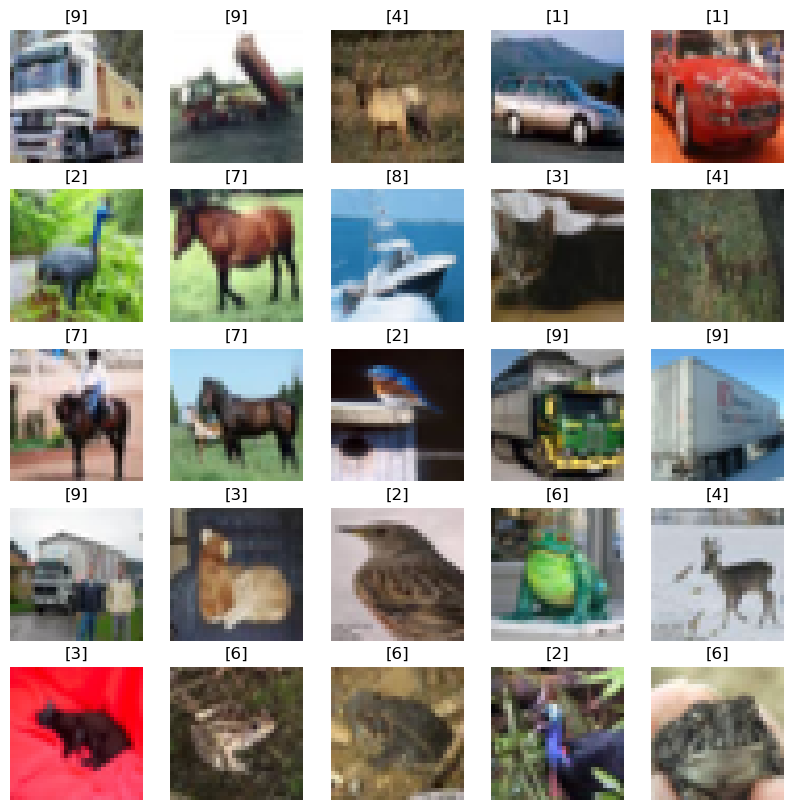

In [10]:
plt.figure(figsize = (10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [11]:
# x_train = np.expand_dims(x_train,-1)
# x_test = np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:
input_shape = (32,32,3)
num_classes = 10
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Rescaling(1./255),
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.2),
        keras.layers.Conv2D(32,kernel_size = (3,3),activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Conv2D(64,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Conv2D(128,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.Conv2D(256,kernel_size = (3,3),padding = 'same',activation='relu'),
        keras.layers.MaxPool2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1024,activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(num_classes,activation='softmax')
    ]
)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,360,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,758,986 (10.52 MB)

 Trainable params: 2,758,986 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
keras.utils.plot_model(model,to_file='MNIST_CNN.png',show_shapes=True,show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [15]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)   

In [ ]:
history = model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.1)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.2629 - loss: 1.9871 - val_accuracy: 0.3912 - val_loss: 1.6898
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.4108 - loss: 1.6320 - val_accuracy: 0.4762 - val_loss: 1.4506
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.4546 - loss: 1.5105 - val_accuracy: 0.5178 - val_loss: 1.3577
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.4822 - loss: 1.4471 - val_accuracy: 0.5408 - val_loss: 1.3048
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.5052 - loss: 1.3779 - val_accuracy: 0.5080 - val_loss: 1.3847
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 34ms/step - accuracy: 0.5304 - loss: 1.3098 - val_accuracy: 0.5474 - val_loss: 1.3039
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.5523 - loss: 1.2598 - val_accuracy: 0.6088 - val_loss: 1.1032
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.5708 -

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(acc,label = 'Training Accuracy')
plt.plot(val_acc,label = 'Validation Accuracy')
plt.plot(loss,label = 'Training Loss')
plt.plot(val_loss,label = 'Validation Loss')
plt.legend()
plt.show()